In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense, BatchNormalization, LeakyReLU, Reshape, Dropout, Conv2D, Flatten, MaxPooling2D, Activation, Input

In [ ]:
#Create Discriminator

def create_discriminator(img_shape=(28,28,1),summary=True):
  model=Sequential()
  model.add(Input(shape=img_shape))
  model.add(Flatten())
  model.add(Dense(512))
  model.add(LeakyReLU(0.3))
  model.add(Dense(256))
  model.add(LeakyReLU(0.3))
  model.add(Dense(1,activation='sigmoid'))
  if summary:
        model.summary()
  return model


In [ ]:
#Create Generator

def create_generator(z_dim=100, output_shape=(28, 28, 1), summary=True):
    model = Sequential()
    model.add(Input(shape=(z_dim,)))
    model.add(Dense(256))
    model.add(LeakyReLU(0.3))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(0.3))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.3))
    model.add(BatchNormalization(momentum=0.8))

    # Flattened output size to match output shape
    model.add(Dense(np.prod(output_shape), activation='tanh'))
    model.add(Reshape(output_shape))

    if summary:
        model.summary()

    return model


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          25,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │         803,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,493,520 (5.70 MB)

 Trainable params: 1,489,936 (5.68 MB)

 Non-trainable params: 3,584 (14.00 KB)

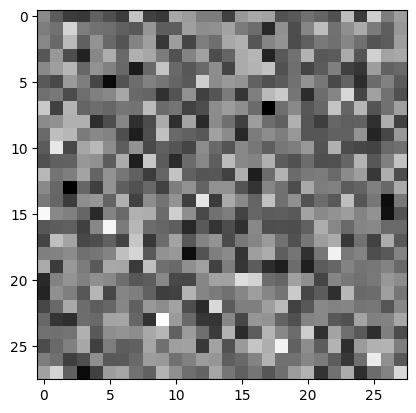

In [ ]:
#Intial Images generated by generator
generator=create_generator()

noise=tf.random.normal(shape=(1,100))
generated_image=generator(noise,training=False)

plt.imshow(generated_image[0,:,:,0],cmap='gray')
plt.show()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 533,505 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 256)                 │          25,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_15 (LeakyReLU)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_16 (LeakyReLU)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_17 (LeakyReLU)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 784)                 │         803,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_3 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,493,520 (5.70 MB)

 Trainable params: 1,489,936 (5.68 MB)

 Non-trainable params: 3,584 (14.00 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
3000 [D loss: 0.35950806736946106, acc.: 77.34%] [G loss: [array(0.5019958, dtype=float32), array(0.5019958, dtype=float32), array(0.546875, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


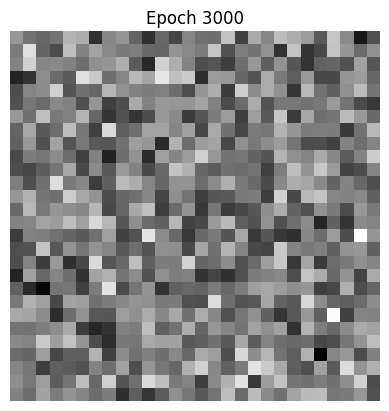

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3000 [D loss: 0.45678138732910156, acc.: 61.07%] [G loss: [array(0.5129523, dtype=float32), array(0.5129523, dtype=float32), array(0.5234375, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


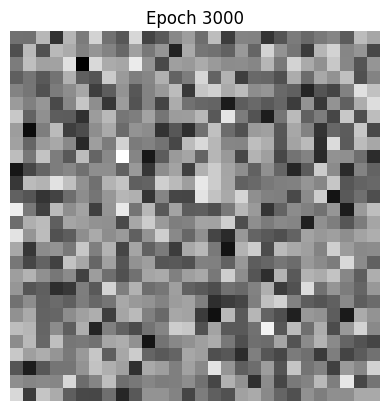

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3000 [D loss: 0.4911573529243469, acc.: 56.72%] [G loss: [array(0.5282785, dtype=float32), array(0.5282785, dtype=float32), array(0.515625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


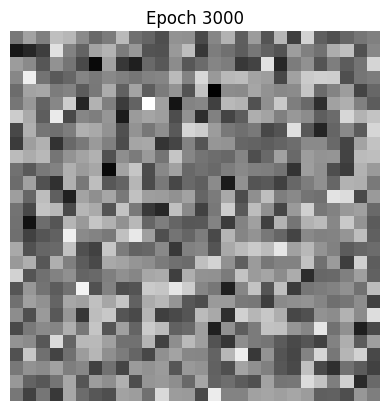

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3000 [D loss: 0.5101642608642578, acc.: 55.02%] [G loss: [array(0.53795, dtype=float32), array(0.53795, dtype=float32), array(0.515625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


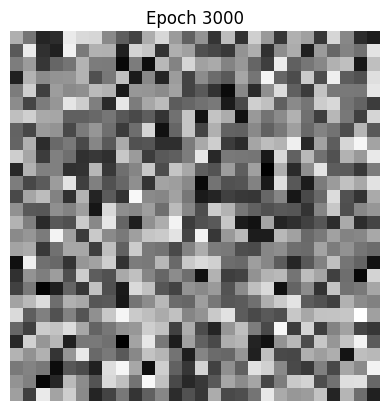

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3000 [D loss: 0.5295762419700623, acc.: 54.41%] [G loss: [array(0.55319476, dtype=float32), array(0.55319476, dtype=float32), array(0.51875, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


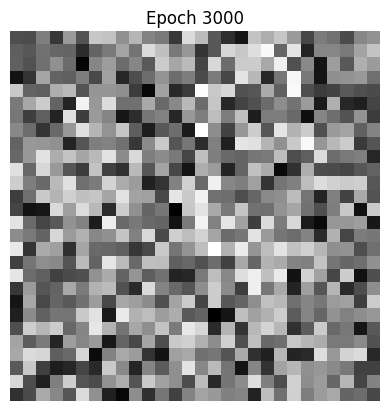

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3000 [D loss: 0.5438475608825684, acc.: 53.91%] [G loss: [array(0.56666493, dtype=float32), array(0.56666493, dtype=float32), array(0.515625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


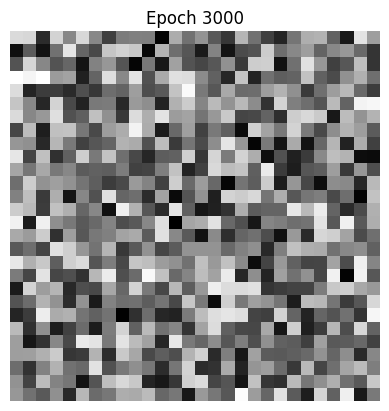

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3000 [D loss: 0.5611482858657837, acc.: 53.31%] [G loss: [array(0.58279765, dtype=float32), array(0.58279765, dtype=float32), array(0.51339287, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


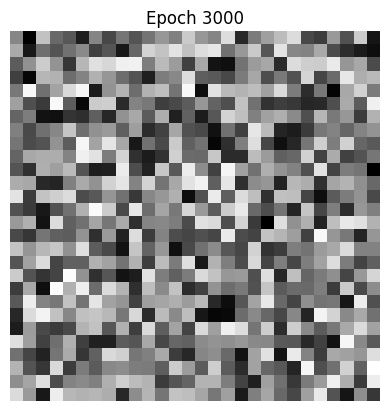

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3000 [D loss: 0.5802233219146729, acc.: 52.88%] [G loss: [array(0.6026783, dtype=float32), array(0.6026783, dtype=float32), array(0.51171875, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


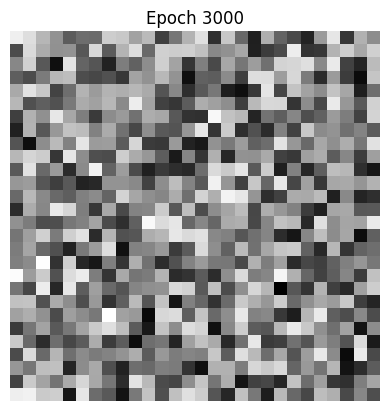

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3000 [D loss: 0.6014978885650635, acc.: 52.54%] [G loss: [array(0.6222145, dtype=float32), array(0.6222145, dtype=float32), array(0.5104167, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


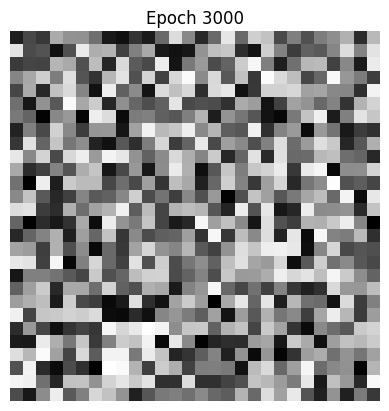

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3000 [D loss: 0.619050920009613, acc.: 52.28%] [G loss: [array(0.6379818, dtype=float32), array(0.6379818, dtype=float32), array(0.509375, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


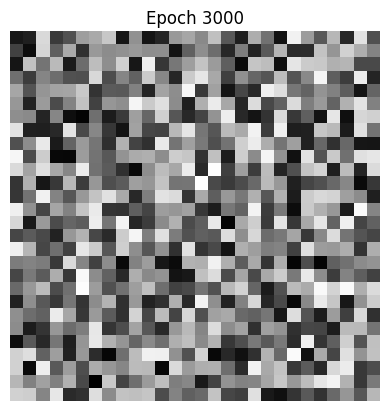

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3000 [D loss: 0.6378068923950195, acc.: 52.06%] [G loss: [array(0.6576708, dtype=float32), array(0.6576708, dtype=float32), array(0.50852275, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


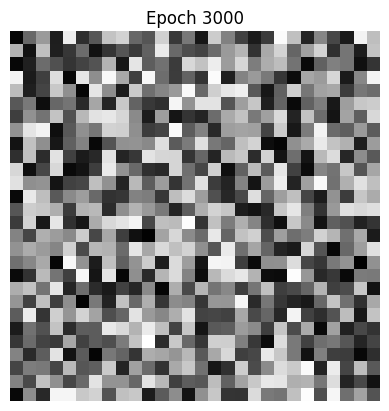

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3000 [D loss: 0.657366156578064, acc.: 51.89%] [G loss: [array(0.67646766, dtype=float32), array(0.67646766, dtype=float32), array(0.5078125, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


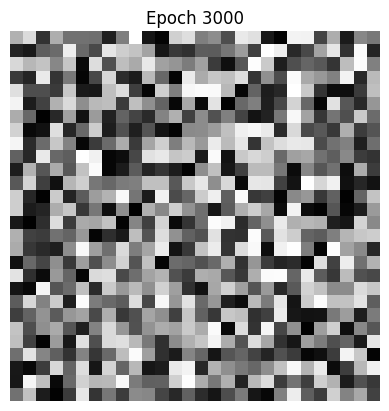

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3000 [D loss: 0.6753731966018677, acc.: 51.74%] [G loss: [array(0.6933869, dtype=float32), array(0.6933869, dtype=float32), array(0.50721157, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


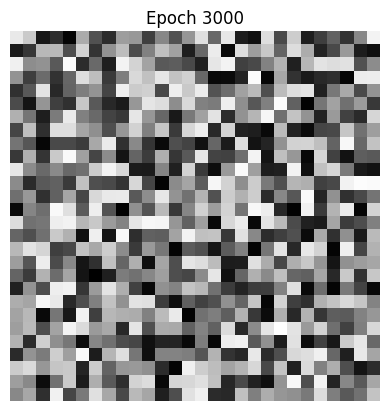

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3000 [D loss: 0.6901166439056396, acc.: 51.61%] [G loss: [array(0.7045103, dtype=float32), array(0.7045103, dtype=float32), array(0.5066964, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


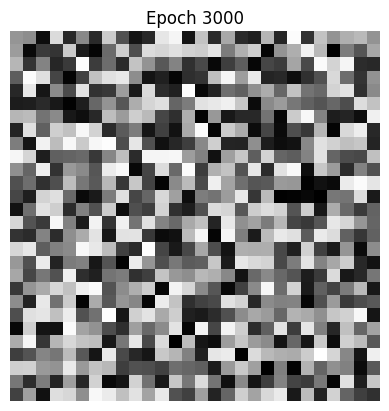

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3000 [D loss: 0.7030086517333984, acc.: 51.50%] [G loss: [array(0.718324, dtype=float32), array(0.718324, dtype=float32), array(0.50625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


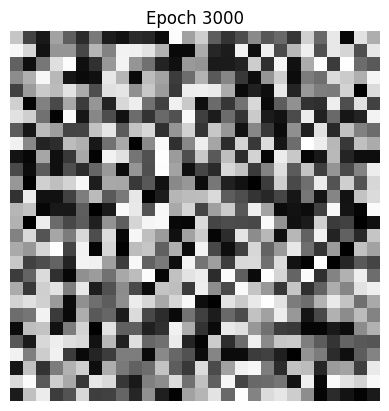

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3000 [D loss: 0.7191355228424072, acc.: 51.40%] [G loss: [array(0.73603326, dtype=float32), array(0.73603326, dtype=float32), array(0.5058594, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


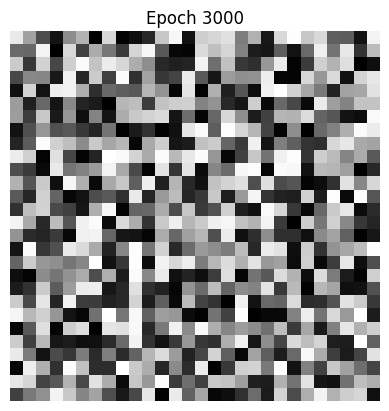

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3000 [D loss: 0.7366777658462524, acc.: 51.32%] [G loss: [array(0.7523884, dtype=float32), array(0.7523884, dtype=float32), array(0.5055147, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


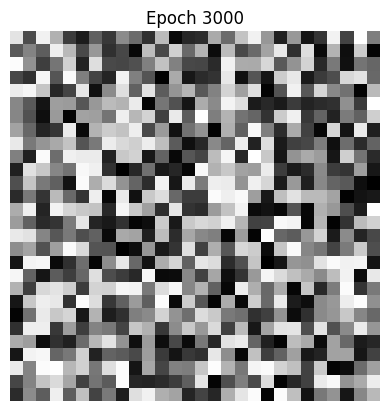

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3000 [D loss: 0.7510513067245483, acc.: 51.24%] [G loss: [array(0.76625943, dtype=float32), array(0.76625943, dtype=float32), array(0.5052083, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


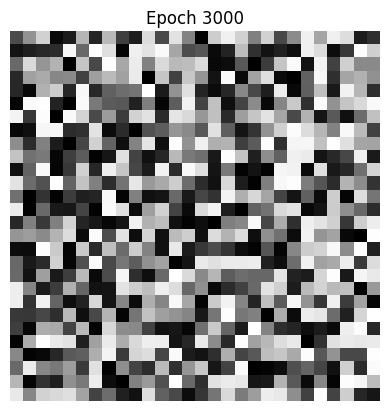

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3000 [D loss: 0.7670193910598755, acc.: 51.18%] [G loss: [array(0.7825419, dtype=float32), array(0.7825419, dtype=float32), array(0.5049342, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


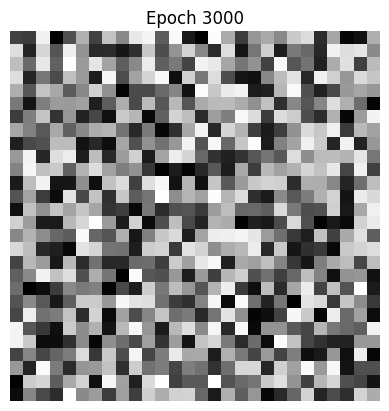

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3000 [D loss: 0.7837539911270142, acc.: 51.12%] [G loss: [array(0.7989851, dtype=float32), array(0.7989851, dtype=float32), array(0.5046875, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


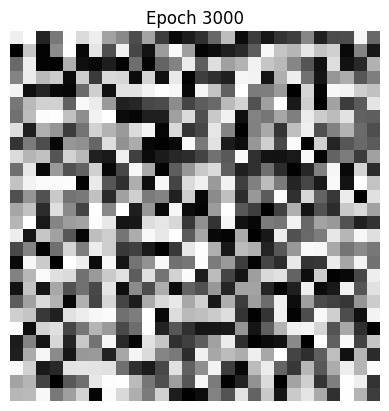

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3000 [D loss: 0.8003239631652832, acc.: 51.06%] [G loss: [array(0.8153536, dtype=float32), array(0.8153536, dtype=float32), array(0.50446427, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


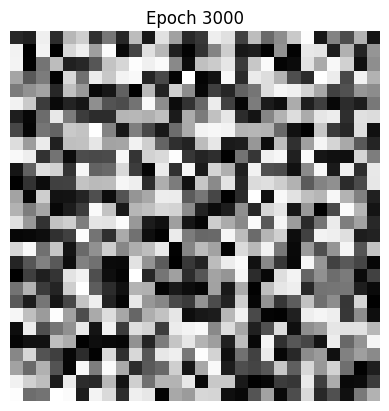

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3000 [D loss: 0.8151552677154541, acc.: 51.01%] [G loss: [array(0.82919747, dtype=float32), array(0.82919747, dtype=float32), array(0.5042614, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


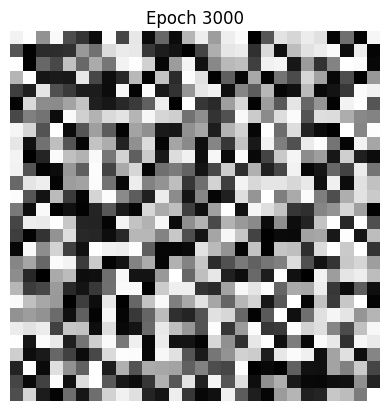

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3000 [D loss: 0.8302919268608093, acc.: 50.97%] [G loss: [array(0.8446462, dtype=float32), array(0.8446462, dtype=float32), array(0.50407606, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


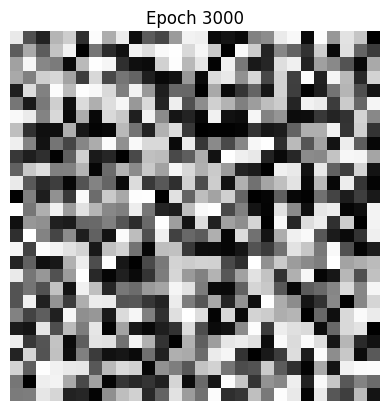

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3000 [D loss: 0.8446768522262573, acc.: 50.93%] [G loss: [array(0.85811085, dtype=float32), array(0.85811085, dtype=float32), array(0.50390625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


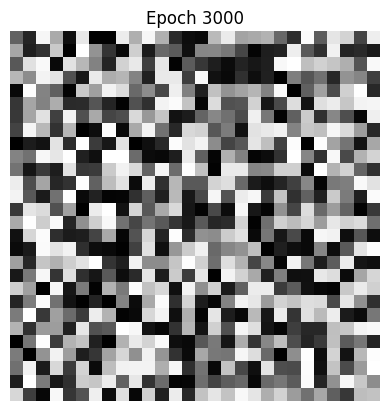

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3000 [D loss: 0.8586101531982422, acc.: 50.89%] [G loss: [array(0.8720289, dtype=float32), array(0.8720289, dtype=float32), array(0.50375, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


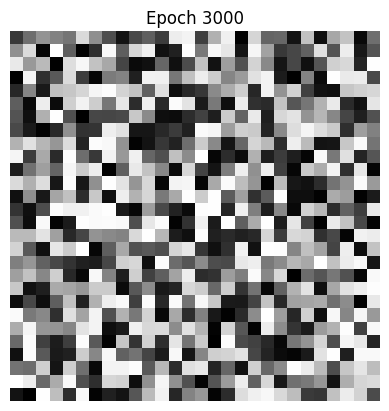

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3000 [D loss: 0.8716480135917664, acc.: 50.85%] [G loss: [array(0.8843327, dtype=float32), array(0.8843327, dtype=float32), array(0.5036058, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


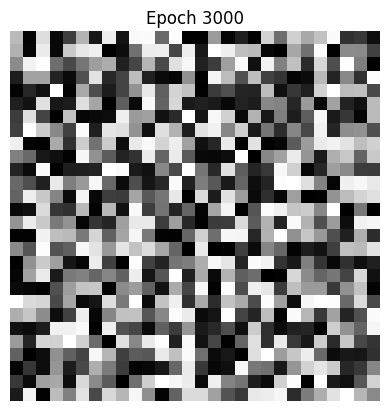

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3000 [D loss: 0.8837873935699463, acc.: 50.82%] [G loss: [array(0.8958426, dtype=float32), array(0.8958426, dtype=float32), array(0.5034722, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


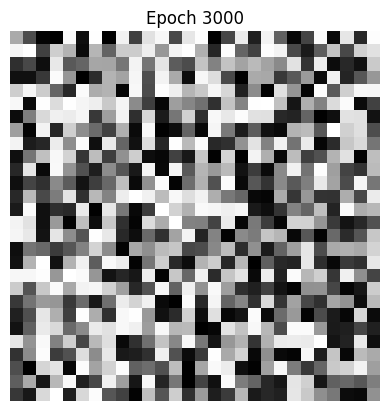

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3000 [D loss: 0.896635115146637, acc.: 50.79%] [G loss: [array(0.909805, dtype=float32), array(0.909805, dtype=float32), array(0.50334823, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


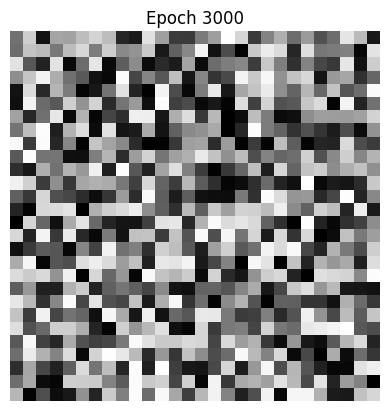

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3000 [D loss: 0.9091967344284058, acc.: 50.76%] [G loss: [array(0.9207516, dtype=float32), array(0.9207516, dtype=float32), array(0.5032328, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


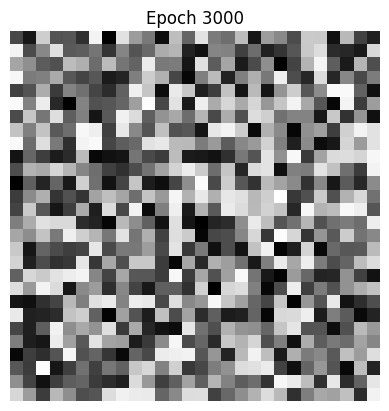

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3000 [D loss: 0.9194172620773315, acc.: 50.74%] [G loss: [array(0.93026894, dtype=float32), array(0.93026894, dtype=float32), array(0.503125, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


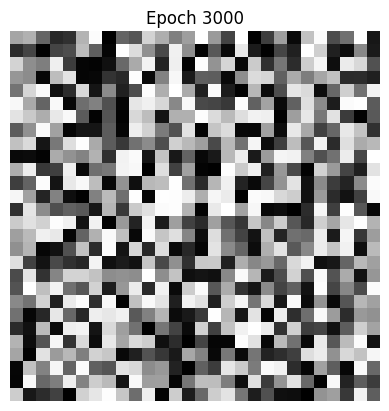

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3000 [D loss: 0.930051326751709, acc.: 50.71%] [G loss: [array(0.94148666, dtype=float32), array(0.94148666, dtype=float32), array(0.5030242, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


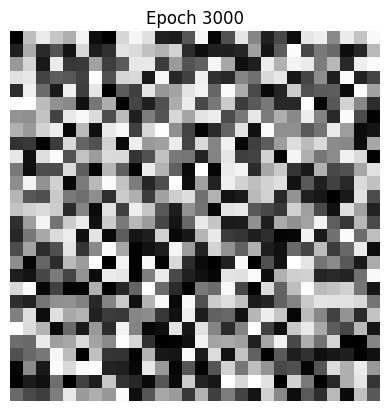

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3000 [D loss: 0.9412744045257568, acc.: 50.69%] [G loss: [array(0.9528349, dtype=float32), array(0.9528349, dtype=float32), array(0.5029297, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


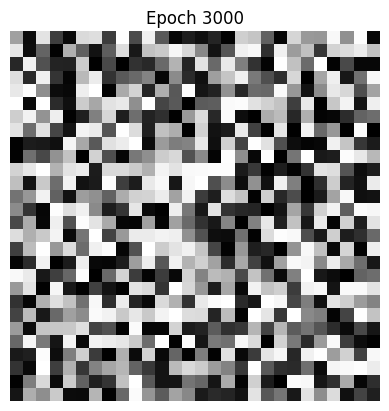

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3000 [D loss: 0.9536285400390625, acc.: 50.67%] [G loss: [array(0.96575844, dtype=float32), array(0.96575844, dtype=float32), array(0.50284094, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


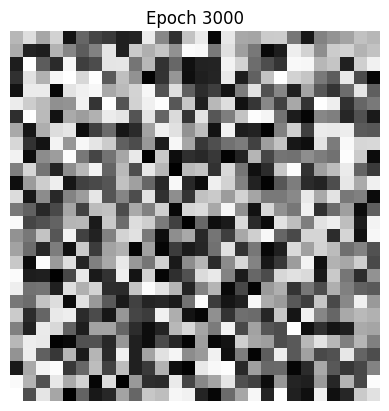

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3000 [D loss: 0.9659804105758667, acc.: 50.65%] [G loss: [array(0.97724295, dtype=float32), array(0.97724295, dtype=float32), array(0.5027574, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


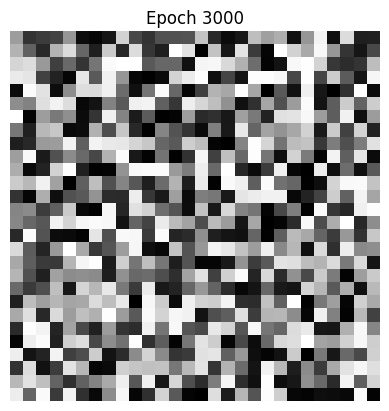

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3000 [D loss: 0.9769176840782166, acc.: 50.63%] [G loss: [array(0.98747224, dtype=float32), array(0.98747224, dtype=float32), array(0.5026786, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


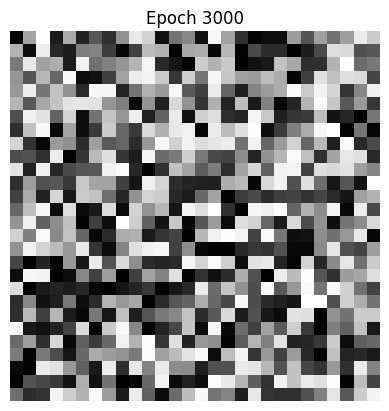

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3000 [D loss: 0.9882036447525024, acc.: 50.61%] [G loss: [array(0.99969184, dtype=float32), array(0.99969184, dtype=float32), array(0.5026042, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


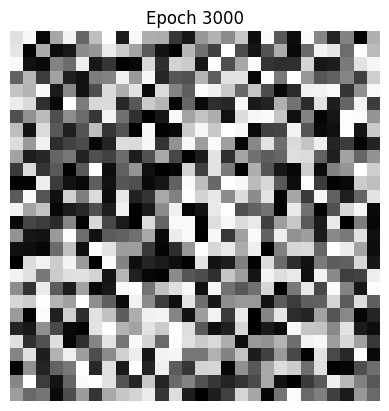

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
3000 [D loss: 0.9996545314788818, acc.: 50.60%] [G loss: [array(1.0103836, dtype=float32), array(1.0103836, dtype=float32), array(0.5025338, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


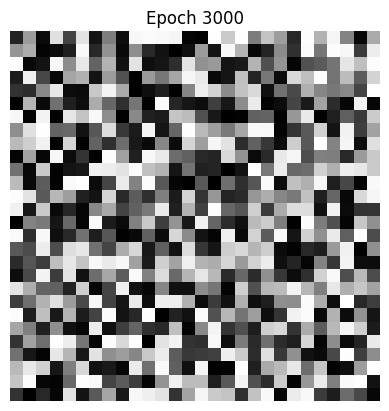

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
3000 [D loss: 1.0111608505249023, acc.: 50.58%] [G loss: [array(1.0222892, dtype=float32), array(1.0222892, dtype=float32), array(0.5024671, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


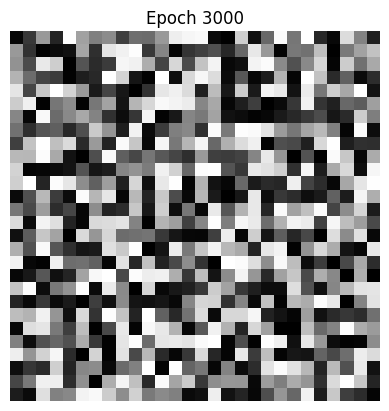

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


KeyboardInterrupt: 

In [ ]:
def training(generator=None, discriminator=None, gan_model=None, epochs=1000, batch_size=128, z_dim=100, sample_interval=200):
  (X_train, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

  X_train=X_train/127.5-1.0

  real_y=np.ones((batch_size))  #labels
  fake_y=np.zeros((batch_size))

  for i in range(epochs):
    id=np.random.randint(0,X_train.shape[0],batch_size)  #Real images
    real_images=X_train[id]


    disc_loss_real=discriminator.train_on_batch(real_images,real_y)

    noise=np.random.normal(0,1,(batch_size,z_dim)) #Fake images
    fake_images=generator.predict(noise)
    disc_loss_fake=discriminator.train_on_batch(fake_images,fake_y)

    discriminators_loss=0.5*np.add(disc_loss_real,disc_loss_fake)
    noise=np.random.normal(0,1,(batch_size,z_dim))
    gen_loss=gan_model.train_on_batch(noise,real_y)
    if epochs % sample_interval == 0:
            print(f"{epochs} [D loss: {discriminators_loss[0]}, acc.: {100*discriminators_loss[1]:.2f}%] [G loss: {gen_loss}]")
            sample_images(generator, epochs)


def sample_images(generator, epoch, z_dim=100):
    noise = np.random.normal(0, 1, (1, z_dim))
    gen_image = generator.predict(noise)

    gen_image = 0.5 * gen_image + 0.5  # Rescale to [0, 1] for display

    plt.imshow(gen_image[0, :, :, 0], cmap='gray')
    plt.title(f"Epoch {epoch}")
    plt.axis('off')
    plt.savefig(f"generated_image_epoch_{epoch}.png")
    plt.show()



discriminator=create_discriminator()
generator=create_generator()

discriminator.compile(loss='binary_crossentropy',optimizer=Adam(0.0002,0.5),metrics=['accuracy'])
z_dim=100
z=Input(shape=(z_dim,))
img=generator(z)

discriminator.trainable=False
validity=discriminator(img)

gan_model=Model(z,validity)
gan_model.compile(loss='binary_crossentropy',optimizer=Adam(0.0002,0.5))
gan_model

training(generator, discriminator, gan_model, epochs=30, batch_size=32, sample_interval=200)


